In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

In [2]:
import src.Teleconnection.pattern_statistic as ps
import src.plots.eof_plots as ept
import src.Teleconnection.spatial_pattern as sp

In [18]:
import src.plots.eof_plots as ept
import src.plots.utils as spu

# load data

In [3]:
dep_EOF = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/changingPattern/dep_EOF.nc")

In [4]:
dep_EOF

<xarray.Dataset>
Dimensions:  (time: 139, lon: 70, lat: 32, hlayers: 11, mode: 2)
Coordinates:
  * time     (time) object 1856-03-03 23:52:00 ... 1994-03-16 11:52:00
  * lon      (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 33.75 35.62 37.5 39.38
  * lat      (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * hlayers  (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode     (mode) object 'NAO' 'EA'
Data variables:
    eof      (time, mode, lat, lon, hlayers) float64 ...

In [10]:
dep_EOF.sel(mode = 'NAO',time = '1856',hlayers = 50000).eof

<xarray.DataArray 'eof' (time: 1, lat: 32, lon: 70)>
array([[[-5.923010e-01, -5.999070e-01, ..., -2.682475e-01, -2.608041e-01],
        [-6.306612e-01, -6.426049e-01, ..., -2.432798e-01, -2.348854e-01],
        ...,
        [ 4.901262e-01,  4.806807e-01, ..., -9.971117e-05,  2.795280e-02],
        [ 4.264365e-01,  4.095612e-01, ...,  1.072246e-01,  1.414611e-01]]])
Coordinates:
  * time     (time) object 1856-03-03 23:52:00
  * lon      (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 33.75 35.62 37.5 39.38
  * lat      (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
    hlayers  float64 5e+04
    mode     <U3 'NAO'

In [46]:
mode = 'NAO'
plev = 100000

In [47]:
mean_eof = dep_EOF.isel(time = [0,-1]).sel(hlayers = 50000).eof

<Figure size 3000x1200 with 0 Axes>

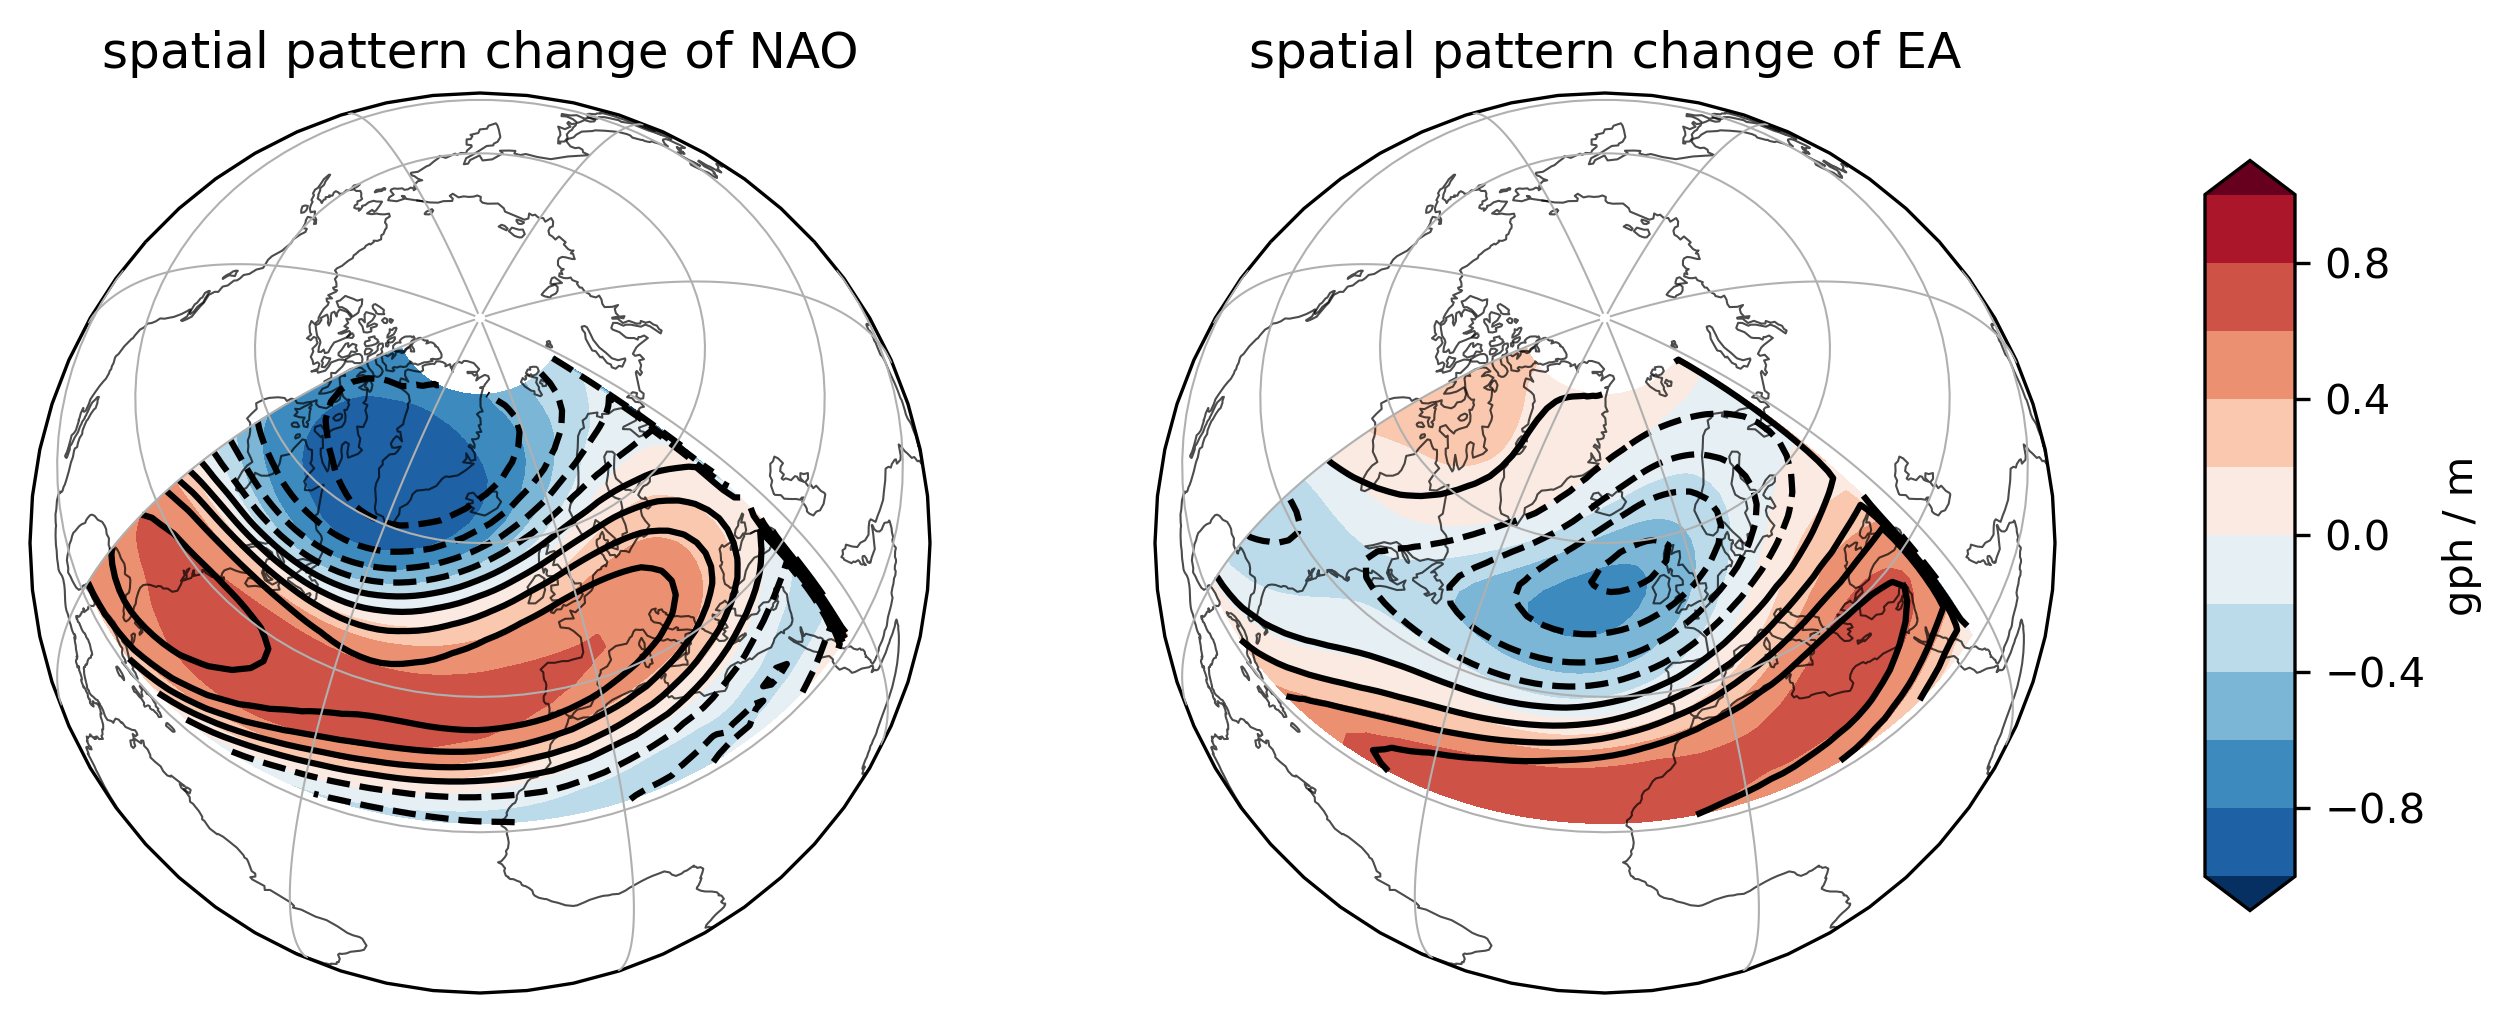

In [50]:
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
fig = plt.figure(figsize = (10,4),dpi = 300)
fig, axes = plt.subplots(
    1,  # shading for first10, contourf for last 10.
    2,  # NAO and EA.
    figsize=(10, 5),
    dpi=300,
    subplot_kw={"projection": proj},
)

modes = ['NAO','EA']

for i, ax in enumerate(axes):
    first = mean_eof.isel(time = 0).sel(mode = modes[i])
    last = mean_eof.isel(time = -1).sel(mode = modes[i])

    first = spu.erase_white_line(first)
    last = spu.erase_white_line(last)

    im = first.plot.contourf(
        levels = np.arange(-1,1.1,0.2),
        extend = 'both',
        transform = ccrs.PlateCarree(),
        add_colorbar = False,
        ax = ax,
    )

    last.plot.contour(
        levels = np.arange(-1,1.1,0.2),
        extend = 'both',
        transform = ccrs.PlateCarree(),
        colors = 'k',
        add_colorbar = False,
        ax = ax
    )

    spu.buildax(ax)

    axes[0].set_title("spatial pattern change of NAO")
    axes[1].set_title("spatial pattern change of EA")
    
fig.subplots_adjust(hspace=0.3, wspace=0.25, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.03, 0.5])
cbar = fig.colorbar(
    im,
    cax=cbar_ax,
    label="gph / m",
)